In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [2]:
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])  # Normalize 
y = y.reshape(-1)

In [3]:
np.random.seed(42)
initial_theta = np.random.randn(X.shape[1])

In [4]:
def bgd(X, y, theta, alpha, max_iters):
    m = len(y)
    cost_history = []
    for _ in range(max_iters):
        h = X.dot(theta)
        error = h - y
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        gradient = (1/m) * X.T.dot(error)
        theta -= alpha * gradient
    return theta, cost_history

In [5]:
def sgd(X, y, theta, alpha, max_iters):
    m = len(y)
    cost_history = []
    for _ in range(max_iters):
        i = np.random.randint(m)
        xi, yi = X[i], y[i]
        error_i = xi.dot(theta) - yi
        theta -= alpha * xi * error_i
        h = X.dot(theta)
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
    return theta, cost_history

In [6]:
def mbgd(X, y, theta, alpha, batch_size, max_iters):
    m = len(y)
    cost_history = []
    for _ in range(max_iters):
        indices = np.random.choice(m, batch_size, replace=False)
        X_batch, y_batch = X[indices], y[indices]
        error_batch = X_batch.dot(theta) - y_batch
        gradient = (1/batch_size) * X_batch.T.dot(error_batch)
        theta -= alpha * gradient
        h = X.dot(theta)
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
    return theta, cost_history

In [7]:
def mgd(X, y, theta, alpha, beta, max_iters):
    m = len(y)
    cost_history = []
    v = np.zeros_like(theta)
    for _ in range(max_iters):
        h = X.dot(theta)
        error = h - y
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        gradient = (1/m) * X.T.dot(error)
        v = beta * v + alpha * gradient
        theta -= v
    return theta, cost_history

In [8]:
alpha_bgd = 0.05
alpha_sgd = 0.01
alpha_mbgd = 0.05
alpha_mgd = 0.05
beta_mgd = 0.9
batch_size = 32
max_iters = 500

In [9]:
theta_bgd, cost_bgd = bgd(X, y, initial_theta.copy(), alpha_bgd, max_iters)
theta_sgd, cost_sgd = sgd(X, y, initial_theta.copy(), alpha_sgd, max_iters)
theta_mbgd, cost_mbgd = mbgd(X, y, initial_theta.copy(), alpha_mbgd, batch_size, max_iters)
theta_mgd, cost_mgd = mgd(X, y, initial_theta.copy(), alpha_mgd, beta_mgd, max_iters)

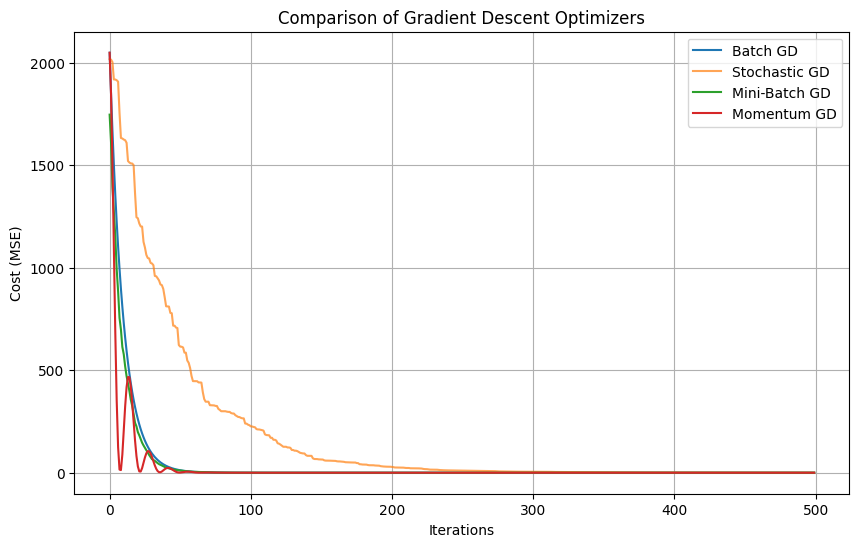

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(cost_bgd, label='Batch GD')
plt.plot(cost_sgd, label='Stochastic GD', alpha=0.7)
plt.plot(cost_mbgd, label='Mini-Batch GD')
plt.plot(cost_mgd, label='Momentum GD')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Comparison of Gradient Descent Optimizers')
plt.legend()
plt.grid(True)
plt.show()

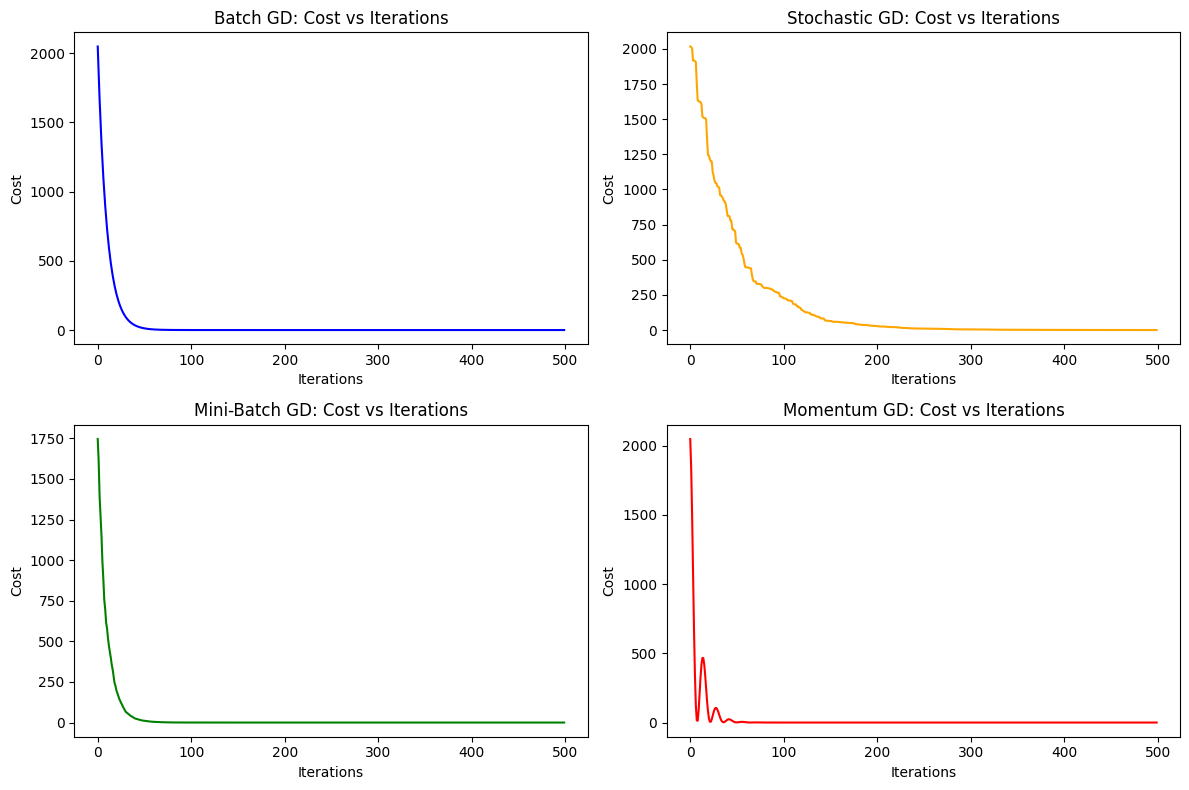

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(cost_bgd, color='blue')
plt.title('Batch GD: Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.subplot(2, 2, 2)
plt.plot(cost_sgd, color='orange')
plt.title('Stochastic GD: Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.subplot(2, 2, 3)
plt.plot(cost_mbgd, color='green')
plt.title('Mini-Batch GD: Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.subplot(2, 2, 4)
plt.plot(cost_mgd, color='red')
plt.title('Momentum GD: Cost vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()


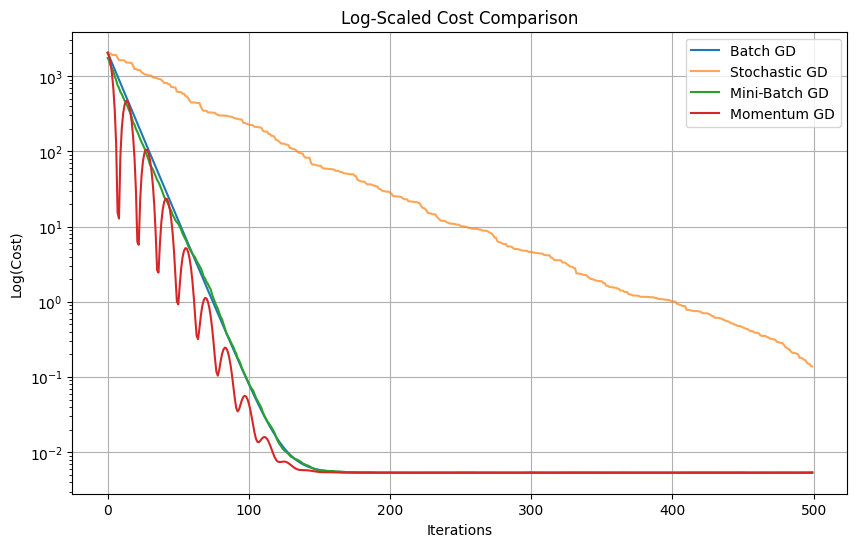

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(cost_bgd, label='Batch GD')
plt.plot(cost_sgd, label='Stochastic GD', alpha=0.7)
plt.plot(cost_mbgd, label='Mini-Batch GD')
plt.plot(cost_mgd, label='Momentum GD')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Log(Cost)')
plt.title('Log-Scaled Cost Comparison')
plt.legend()
plt.grid(True)
plt.show()

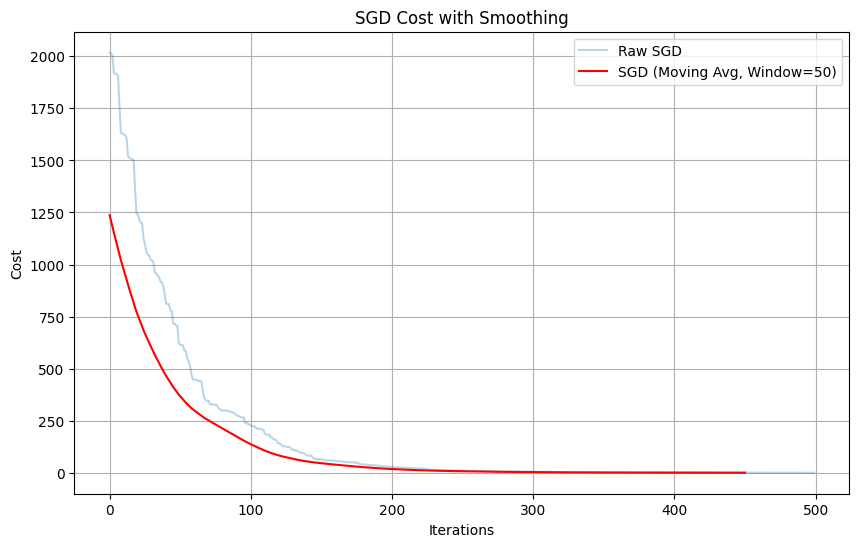

In [18]:
window_size = 50
sgd_smoothed = np.convolve(cost_sgd, np.ones(window_size)/window_size, mode='valid')
plt.figure(figsize=(10, 6))
plt.plot(cost_sgd, label='Raw SGD', alpha=0.3)
plt.plot(sgd_smoothed, label=f'SGD (Moving Avg, Window={window_size})', color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('SGD Cost with Smoothing')
plt.legend()
plt.grid(True)
plt.show()